# Furness           

In [ ]:
import numpy as np

matrix = np.array([[43, 35, 18, 62, 25],
                   [32, 18, 26, 42, 51],
                   [60, 68, 18, 15, 90],
                   [71, 35, 18, 35, 60],
                   [34, 12, 43, 25, 48]], dtype=float)

O_i = [240, 350, 270, 330, 204]
D_j = [300, 220, 160, 420, 294]

f_i = [0] * 5
f_j = [0] * 5

In [11]:
ratio = sum(O_i) / sum(D_j)

if ratio != 1:
    D_j = [i * ratio for i in D_j]
    print("new destination", D_j)
else:
    print("sum(O_i) = sum(D_j)")

sum(O_i) = sum(D_j)


In [12]:
target = sum(O_i)

row = len(O_i)
column = len(O_i)

error_list = []

repeat = 0
error = 0


while  error <1000 :

    if repeat == 0 :
        error=0
        for i in range(row):
            error += abs(D_j[i] - matrix.sum(axis=0, dtype=float).item(i))
            
        for j in range(column):
            error += abs(O_i[j] - matrix.sum(axis=1, dtype=float).item(j))
            
        repeat += 1
        error = 100 * (error / target)

        print('#### Matrix', repeat , ":")
        np.set_printoptions(precision=4, suppress=True)
        print(matrix)
        print('#### %error Matrix', repeat , ":", error)
        print()
        error_list.append(error) 
    
    if error < 1 :
        break



    for i in range(row):
        f_i[i] = O_i[i] / matrix.sum(axis=1, dtype=float).item(i)
 
    for j in range(row):
        for i in range(column): 
             matrix[i][j] = matrix[i][j] * f_i[i]
    #error
    error=0
    for i in range(row):
        error += abs(D_j[i] - matrix.sum(axis=0, dtype=float).item(i))
    error = 100 * (error / target)
    repeat += 1
    
    print('#### Matrix', repeat , ":")
    np.set_printoptions(precision=4, suppress=True)
    print(matrix)
    print('#### %error Matrix', repeat , ":", error)
    print()
    error_list.append(error) 
    
    if error < 1 :
        break
      
    
    
    for i in range(row):
        f_j[i] = D_j[i] / matrix.sum(axis=0, dtype=float).item(i)
  
    for i in range(row):
        for j in range(column): 
            matrix[i][j] = matrix[i][j] * f_j[j]
    #error
    error=0
    for j in range(column):
        error += abs(O_i[j] - matrix.sum(axis=1, dtype=float).item(j))
    error = 100 * (error / target)
    repeat += 1

    print('#### Matrix', repeat , ":")
    np.set_printoptions(precision=4, suppress=True)
    print(matrix)
    print('#### %error Matrix', repeat , ":", error)
    print()
    error_list.append(error)
    
    if error < 1 :
        break

#### Matrix 1 :
[[43. 35. 18. 62. 25.]
 [32. 18. 26. 42. 51.]
 [60. 68. 18. 15. 90.]
 [71. 35. 18. 35. 60.]
 [34. 12. 43. 25. 48.]]
#### %error Matrix 1 : 58.82352941176471

#### Matrix 2 :
[[ 56.3934  45.9016  23.6066  81.3115  32.7869]
 [ 66.2722  37.2781  53.8462  86.9822 105.6213]
 [ 64.5418  73.1474  19.3625  16.1355  96.8127]
 [106.9863  52.7397  27.1233  52.7397  90.411 ]
 [ 42.8148  15.1111  54.1481  31.4815  60.4444]]
#### %error Matrix 2 : 21.71443477664913

#### Matrix 3 :
[[ 50.2006  45.0462  21.209  127.1199  24.9675]
 [ 58.9945  36.5834  48.3775 135.9855  80.4314]
 [ 57.4542  71.7842  17.3961  25.2257  73.7236]
 [ 95.2376  51.7568  24.3686  82.4517  68.8486]
 [ 38.1131  14.8295  48.6488  49.2172  46.0289]]
#### %error Matrix 3 : 5.58327253649104

#### Matrix 4 :
[[ 44.8648  40.2583  18.9548 113.6085  22.3137]
 [ 57.2965  35.5304  46.9851 132.0715  78.1164]
 [ 63.1663  78.921   19.1256  27.7337  81.0533]
 [ 97.4031  52.9337  24.9227  84.3265  70.4141]
 [ 39.5     15.3691  

### Error value after each iteration

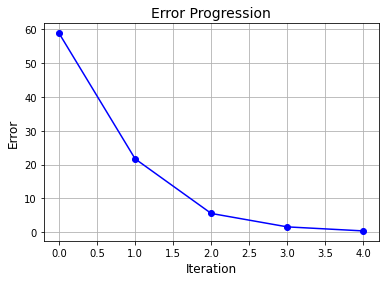

In [13]:
import matplotlib.pyplot as plt

color = 'blue'
marker = 'o'
linestyle = '-'
plt.plot(error_list, color=color, marker=marker, linestyle=linestyle)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Error Progression', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True)
plt.show()

# 

# Gravity Distribution Model

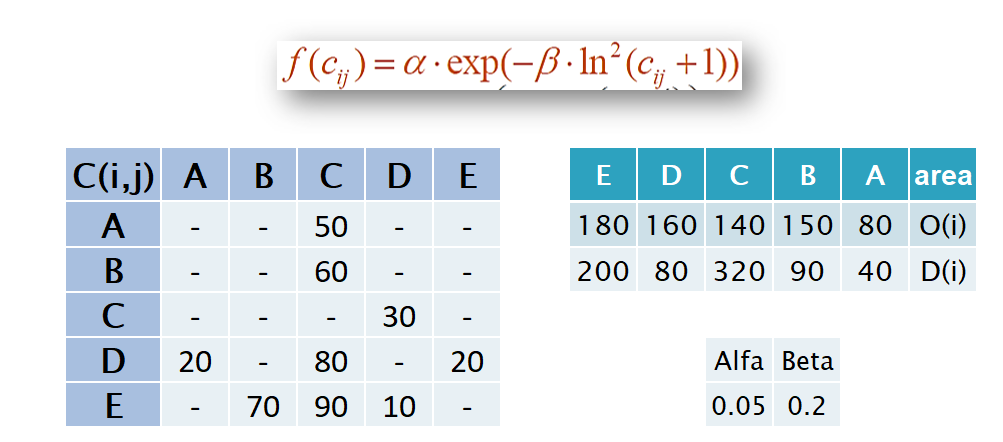

In [8]:
import numpy as np
import pandas as pd
import math


# Read data from Excel file
R = pd.read_excel('D:/Uni/7/haml/HW/HW6/HW6.xlsx')

c_ij = R.iloc[0:5,1:6]
c_ij = c_ij.replace('-', np.inf)
C = np.arange(1, c_ij.shape[1]+1)
c_ij.index = C
c_ij.columns = C
c_ij

O = R.iloc[0,8:13].values.tolist()
D = R.iloc[1,8:13].values.tolist()

Beta = R.iloc[6,10]
alfa = R.iloc[6,9]

print("c_ij:","\n", c_ij, "\nO:", O, "\nD:", D, "\nBeta:", Beta, "\nalfa:", alfa)


c_ij: 
       1     2     3     4     5
1   inf   inf  50.0   inf   inf
2   inf   inf  60.0   inf   inf
3   inf   inf   inf  30.0   inf
4  20.0   inf  80.0   inf  20.0
5   inf  70.0  90.0  10.0   inf 
O: [180.0, 160, 140, 150.0, 80.0] 
D: [200.0, 80, 320, 90.0, 40.0] 
Beta: 0.2 
alfa: 0.05


In [10]:

# sum(O)!=sum(D)?
if sum(O)!=sum(D):
    for i in range (len(O)):
        D[i]= D[i] * (sum(O)/sum(D))

In [12]:
# Get the f(cij)
ln = np.log
def f(cij):
    if cij == np.inf:
        return 0
    A = ln(cij + 1)
    return ((alfa) * math.exp(-1 * Beta * A ** 2))
F = c_ij.applymap(f)
F

,1,2,3,4,5
1,0.000000,0.00000,0.002271,0.000000,0.000000
2,0.000000,0.00000,0.001703,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.004728,0.000000
4,0.007832,0.00000,0.001051,0.000000,0.007832
5,0.000000,0.00132,0.000854,0.015832,0.000000


In [13]:
#Calculate the error on every iteration
iteration = 0
A=[]
B=[]
for i in range(len(D)):
    A.append(0)
    B.append(1)
A = np.array(A)
B = np.array(B)
D = np.array(D)
O = np.array(O)
error_list=[]
e = 100

In [14]:
while e > 1 :
    iteration += 1
    
    # A
    A = np.reciprocal(np.dot(B * D, F.T))
    
    # B
    B = np.reciprocal(np.dot(A * O, F))
         
    #T_ij    
    T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
            
    #Error        
    b = np.sum(np.abs(O - np.sum(T, axis=1))) + np.sum(np.abs(D - np.sum(T, axis=0)))
    e = b * 100 / np.sum(O)
    error_list.append("{:.4f}%".format(e))
    
    print()
    print("Error_matrix" , iteration , ": " , "{:.4f}%".format(e))    
    print("T_matrix" , iteration , ": " ,"\n", T)

    if iteration == 1000:
        break


Error_matrix 1 :  38.3919%
T_matrix 1 :  
             1          2           3          4          5
1    0.000000   0.000000  150.057710   0.000000   0.000000
2    0.000000   0.000000  133.384631   0.000000   0.000000
3    0.000000   0.000000    0.000000  61.157474   0.000000
4  192.905474   0.000000   19.117084   0.000000  39.543296
5    0.000000  77.921537   10.025915  27.669188   0.000000

Error_matrix 2 :  29.9043%
T_matrix 2 :  
             1          2           3          4          5
1    0.000000   0.000000  157.018354   0.000000   0.000000
2    0.000000   0.000000  139.571870   0.000000   0.000000
3    0.000000   0.000000    0.000000  78.140663   0.000000
4  192.905474   0.000000    9.943497   0.000000  39.543296
5    0.000000  77.921537    6.051619  10.685999   0.000000

Error_matrix 3 :  26.7293%
T_matrix 3 :  
             1          2           3          4          5
1    0.000000   0.000000  160.177965   0.000000   0.000000
2    0.000000   0.000000  142.380413   0.0

C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, n

Error_matrix 792 :  22.9740%
T_matrix 792 :  
             1          2              3              4          5
1    0.000000   0.000000   1.654864e+02   0.000000e+00   0.000000
2    0.000000   0.000000   1.470990e+02   0.000000e+00   0.000000
3         NaN   0.000000   0.000000e+00   8.882666e+01        NaN
4  192.905474   0.000000  5.512279e-179   0.000000e+00  39.543296
5    0.000000  77.921537   2.961451e-20  3.086445e-147   0.000000

Error_matrix 793 :  22.9740%
T_matrix 793 :  
             1          2              3              4          5
1    0.000000   0.000000   1.654864e+02   0.000000e+00   0.000000
2    0.000000   0.000000   1.470990e+02   0.000000e+00   0.000000
3         NaN   0.000000   0.000000e+00   8.882666e+01        NaN
4  192.905474   0.000000  3.270280e-179   0.000000e+00  39.543296
5    0.000000  77.921537   2.795289e-20  2.010510e-147   0.000000

Error_matrix 794 :  22.9740%
T_matrix 794 :  
             1          2              3              4          5

C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, n

            1          2              3              4          5
1    0.000000   0.000000   1.654864e+02   0.000000e+00   0.000000
2    0.000000   0.000000   1.470990e+02   0.000000e+00   0.000000
3         NaN   0.000000   0.000000e+00   8.882666e+01        NaN
4  192.905474   0.000000  5.814253e-189   0.000000e+00  39.543296
5    0.000000  77.921537   2.333887e-21  1.989578e-155   0.000000

Error_matrix 837 :  22.9740%
T_matrix 837 :  
             1          2              3              4          5
1    0.000000   0.000000   1.654864e+02   0.000000e+00   0.000000
2    0.000000   0.000000   1.470990e+02   0.000000e+00   0.000000
3         NaN   0.000000   0.000000e+00   8.882666e+01        NaN
4  192.905474   0.000000  3.449432e-189   0.000000e+00  39.543296
5    0.000000  77.921537   2.202936e-21  1.296011e-155   0.000000

Error_matrix 838 :  22.9740%
T_matrix 838 :  
             1          2              3              4          5
1    0.000000   0.000000   1.654864e+02   0.00

C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, n

 :  
             1          2              3              4          5
1    0.000000   0.000000   1.654864e+02   0.000000e+00   0.000000
2    0.000000   0.000000   1.470990e+02   0.000000e+00   0.000000
3         NaN   0.000000   0.000000e+00   8.882666e+01        NaN
4  192.905474   0.000000  9.412093e-201   0.000000e+00  39.543296
5    0.000000  77.921537   1.158864e-22  4.157627e-165   0.000000

Error_matrix 889 :  22.9740%
T_matrix 889 :  
             1          2              3              4          5
1    0.000000   0.000000   1.654864e+02   0.000000e+00   0.000000
2    0.000000   0.000000   1.470990e+02   0.000000e+00   0.000000
3         NaN   0.000000   0.000000e+00   8.882666e+01        NaN
4  192.905474   0.000000  5.583929e-201   0.000000e+00  39.543296
5    0.000000  77.921537   1.093842e-22  2.708279e-165   0.000000

Error_matrix 890 :  22.9740%
T_matrix 890 :  
             1          2              3              4          5
1    0.000000   0.000000   1.654864e+02 

C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, n



Error_matrix 943 :  22.9740%
T_matrix 943 :  
             1          2              3              4          5
1    0.000000   0.000000   1.654864e+02   0.000000e+00   0.000000
2    0.000000   0.000000   1.470990e+02   0.000000e+00   0.000000
3         NaN   0.000000   0.000000e+00   8.882666e+01        NaN
4  192.905474   0.000000  3.181556e-213   0.000000e+00  39.543296
5    0.000000  77.921537   4.838953e-24  2.401450e-175   0.000000

Error_matrix 944 :  22.9740%
T_matrix 944 :  
             1          2              3              4          5
1    0.000000   0.000000   1.654864e+02   0.000000e+00   0.000000
2    0.000000   0.000000   1.470990e+02   0.000000e+00   0.000000
3         NaN   0.000000   0.000000e+00   8.882666e+01        NaN
4  192.905474   0.000000  1.887527e-213   0.000000e+00  39.543296
5    0.000000  77.921537   4.567447e-24  1.564305e-175   0.000000

Error_matrix 945 :  22.9740%
T_matrix 945 :  
             1          2              3              4         

C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, np.newaxis] * O[:, np.newaxis] * (B * D) * F
C:\Users\Mehrzad\AppData\Local\Temp\ipykernel_14536\692579911.py:11: RuntimeWarning: overflow encountered in multiply
  T = A[:, n

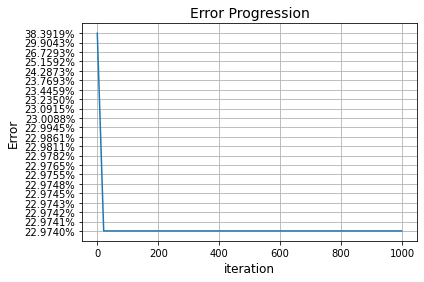

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(len(error_list)), error_list)
plt.xlabel('iteration', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Error Progression', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True)

plt.gca().invert_yaxis()

plt.show()
